<a href="https://colab.research.google.com/github/arjundussa65/Thesis-2020/blob/master/Polarity_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polarity Score assignment for tweet text

This file contains polarity assignments using Vader and Textblob NLP libraries.

In [ ]:
! pip install vaderSentiment                    # Install vaderSentiment for populate polarity for text


In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Import libraries
import pandas as pd
import numpy as np 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly.offline import iplot

In [ ]:
#Read file from Google Drive
df=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/covid_cleaned.csv", encoding='utf-8')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818 entries, 0 to 19817
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   User       19818 non-null  object 
 1   Text       19804 non-null  object 
 2   Date       19818 non-null  object 
 3   Favorites  19818 non-null  int64  
 4   Retweets   19818 non-null  int64  
 5   Mentions   4320 non-null   object 
 6   HashTags   19806 non-null  object 
 7   location   0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
#Drop location column as it has no data
df.drop(columns=['location'],axis=1,inplace=True)

In [ ]:
df.dropna(subset=['Text'],inplace=True)  # Removed the Null values from Tweet_text column
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19804 entries, 0 to 19803
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User       19804 non-null  object
 1   Text       19804 non-null  object
 2   Date       19804 non-null  object
 3   Favorites  19804 non-null  int64 
 4   Retweets   19804 non-null  int64 
 5   Mentions   4320 non-null   object
 6   HashTags   19792 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


In [ ]:
df.head()

,User,Text,Date,Favorites,Retweets,Mentions,HashTags
0,KendallHarmon6,stat news speed is critical as spreads in offi...,2020-03-01 23:59:17+00:00,0,0,NaN,#coronavirus #USA #economy #covid19 #globalisa...
1,Switzercomau,the first australian has now passed away from ...,2020-03-01 23:45:00+00:00,0,0,NaN,#australia #ausnews #breakingnews #worldnews #...
2,TushK11,new york magazine new coronavirus cases confir...,2020-03-01 23:41:02+00:00,0,0,@googlenews,#coronavirususa #StockMarket #COVID19 #stocks
3,StockDaddy0,still not at friday lows but we moving let s s...,2020-03-01 23:39:19+00:00,0,0,NaN,#DoctorWho #COVID #March1st #SundayThoughts #C...
4,murtdoc,things look bleak for oil barrel seems an easy...,2020-03-01 23:38:43+00:00,0,0,NaN,#Oil #stock #COVID19 #financialcrush2020


## Vader Polarity

In [ ]:
analyzer = SentimentIntensityAnalyzer()                           # getting sentiment polarity using Vader library from Tweet_Text on compound 
sentiment = df['Text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df,sentiment.apply(pd.Series)],1)
df = df.rename(columns={'compound':'vader_polarity'})

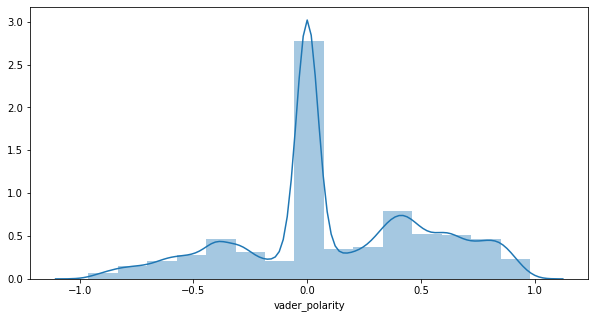

In [ ]:
#Histogram plot of vader sentiment scores
fig = plt.figure(figsize=(10,5))    
ax = fig.add_subplot(111)
sns.distplot(df['vader_polarity'], bins=15, ax=ax)     # Plot histogram plot to know distribution of sentiment 
plt.show()

## Textblob polarity

In [ ]:
#Add Polarity based on TextBlob 
df['Textblob_Polarity'] = df['Text'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,User,Text,Date,Favorites,Retweets,Mentions,HashTags,neg,neu,pos,vader_polarity,Textblob_Polarity
0,KendallHarmon6,stat news speed is critical as spreads in offi...,2020-03-01 23:59:17+00:00,0,0,NaN,#coronavirus #USA #economy #covid19 #globalisa...,0.150,0.850,0.000,-0.3182,0.000000
1,Switzercomau,the first australian has now passed away from ...,2020-03-01 23:45:00+00:00,0,0,NaN,#australia #ausnews #breakingnews #worldnews #...,0.000,1.000,0.000,0.0000,0.250000
2,TushK11,new york magazine new coronavirus cases confir...,2020-03-01 23:41:02+00:00,0,0,@googlenews,#coronavirususa #StockMarket #COVID19 #stocks,0.103,0.897,0.000,-0.3412,0.080682
3,StockDaddy0,still not at friday lows but we moving let s s...,2020-03-01 23:39:19+00:00,0,0,NaN,#DoctorWho #COVID #March1st #SundayThoughts #C...,0.127,0.812,0.062,-0.3300,0.000000
4,murtdoc,things look bleak for oil barrel seems an easy...,2020-03-01 23:38:43+00:00,0,0,NaN,#Oil #stock #COVID19 #financialcrush2020,0.106,0.763,0.131,-0.0258,-0.088889


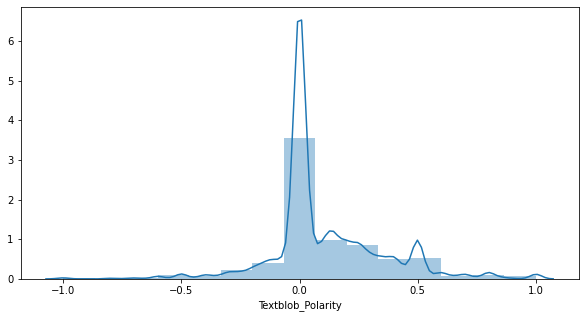

In [ ]:
# Histogram plot for TextBlob Ploarity score 

fig = plt.figure(figsize=(10,5))    
ax = fig.add_subplot(111)
sns.distplot(df['Textblob_Polarity'], bins=15, ax=ax)     # Plot histogram plot to know distribution of sentiment 
plt.show()

## Histogram plot of Vader and Texblob polarity scores

Text(0, 0.5, 'Probability Density')

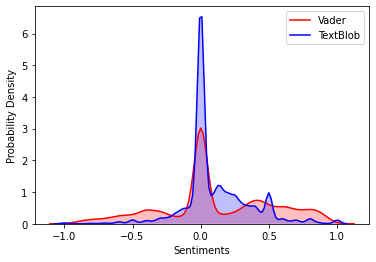

In [ ]:
sns.kdeplot(df['vader_polarity'], 
            color='r', shade=True, Label='Vader') 

sns.kdeplot(df['Textblob_Polarity'], 
            color='b', shade=True, Label='TextBlob')
  
plt.xlabel('Sentiments') 
plt.ylabel('Probability Density') 

After checking the distribution for both the polarity scores, Vader has given more uniform distribution than Texblob scores. Hence assigning labels as per vader scores for the tweets

In [ ]:
# Create New Column Num_Sentiment based on Polarity Score
cut = pd.cut(
    df['vader_polarity'],
    [-np.inf, -.2, .2, np.inf],
    labels=[-1, 0, 1]
)
df['Num_Sentiment'] = cut.values
df[['Num_Sentiment','vader_polarity']][:10]

,Num_Sentiment,vader_polarity
0,-1,-0.3182
1,0,0.0000
2,-1,-0.3412
3,-1,-0.3300
4,0,-0.0258
5,0,0.0000
6,-1,-0.3400
7,1,0.2500
8,0,0.1531
9,0,0.0000


In [ ]:
temp = df.groupby('Num_Sentiment').count()['Text'].reset_index().sort_values(by='Text',ascending=False)  # get the count of each sentiment
temp.style.background_gradient(cmap='Purples')

,Num_Sentiment,Text
1,0,8414
2,1,7591
0,-1,3799


In [ ]:
#Saving labelled tweets file to google drive
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/covid_labelled.csv", index=None, encoding='utf-8')